In [1]:
import pandas as pd
import numpy as np
from src import LogisticRegression, DPLogisticRegression
# from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Read in data
- Using publicly available Wisconsin breast cancer data
    - Small dataset but with good predictors

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# split data
# X_train , X_test , y_train , y_test = train_test_split (predictors, target , test_size=0.2, random_state = 9)
X_train , X_test , y_train , y_test = train_test_split (X, y , test_size=0.2, random_state = 9)
# normalize data
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [5]:
# y_train = y_train.values
# y_test = y_test.values

### Model

In [6]:
# model hyperparameters
learning_rate = 0.001
n_iter = 100000
batch_size = 32

In [12]:
np_model = LogisticRegression(lr=learning_rate, num_iter=n_iter, verbose=False)
np_model.fit(X_train, y_train, batch_size=batch_size, sample_with_replacement=True)
# get accuracy
np_preds_train = np_model.predict(X_train, threshold = 0.5)
accuracy_score(y_train, np_preds_train)
# get accuracy
np_preds_test = np_model.predict(X_test, threshold = 0.5)
accuracy_score(y_test, np_preds_test)

100%|██████████| 100000/100000 [00:15<00:00, 6555.97it/s]


0.8771929824561403

### Private Logistic Regression

In [8]:
model = DPLogisticRegression(lr=learning_rate, num_iter=n_iter, verbose=False, fit_intercept = True, 
                            clipping_param=1, sigma=2, delta=1e-2)
% time model.fit(X_train, y_train, batch_size=batch_size, repeat_data = True, sample_with_replacement = True)
preds = model.predict(X_train, threshold = 0.5)
# accuracy
accuracy_score(y_train, preds)

100%|██████████| 100000/100000 [01:29<00:00, 1118.79it/s]

CPU times: user 2min 30s, sys: 12 s, total: 2min 42s
Wall time: 1min 29s


0.945054945054945

In [9]:
test_preds = model.predict(X_test, threshold = 0.5)
# accuracy
(test_preds == y_test).mean()

0.9385964912280702

In [10]:
model.epsilon

0.2823549761417656

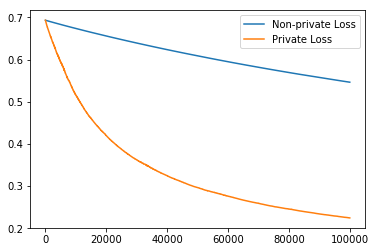

In [11]:
plt.plot(np_model.loss_by_epoch, label = 'Non-private Loss')
plt.plot(model.loss_by_epoch, label = 'Private Loss')
plt.legend()
plt.show()